## Question 1

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

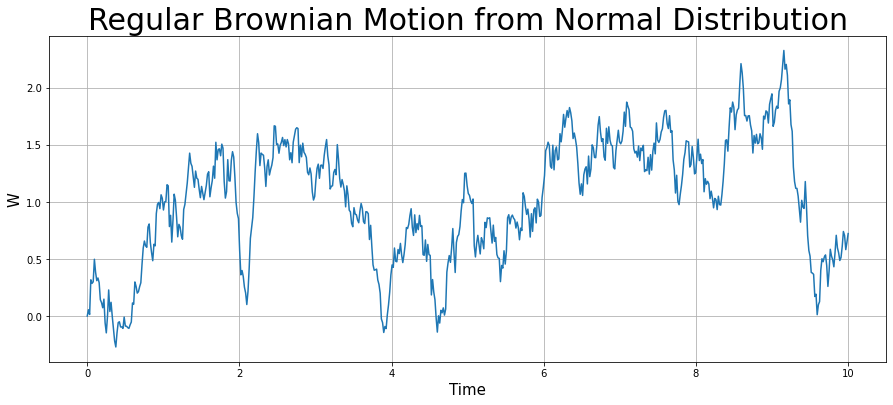

In [83]:
def brownian(s,t,n):
    np.random.seed(s)
    #y = np.random.normal(loc=0, scale=1, size=int(t*n))
    x = np.linspace(0,t,num=int(t*n))
    w = np.zeros(int(t*n))
    #for i in range(int(t*n)-1):
        #w[i+1] = y[i]
    for i in range(1,int(t*n)):
        w[i] = w[i-1] + np.random.normal()/np.sqrt(n)
    return x,w
def plotB(x,w):
    plt.figure(figsize=(15, 6))
    plt.plot(x,w)
    plt.title('Regular Brownian Motion from Normal Distribution', fontsize=30)
    plt.ylabel('W', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()
x,w = brownian(5,10,64)
plotB(x,w)

## Question 2

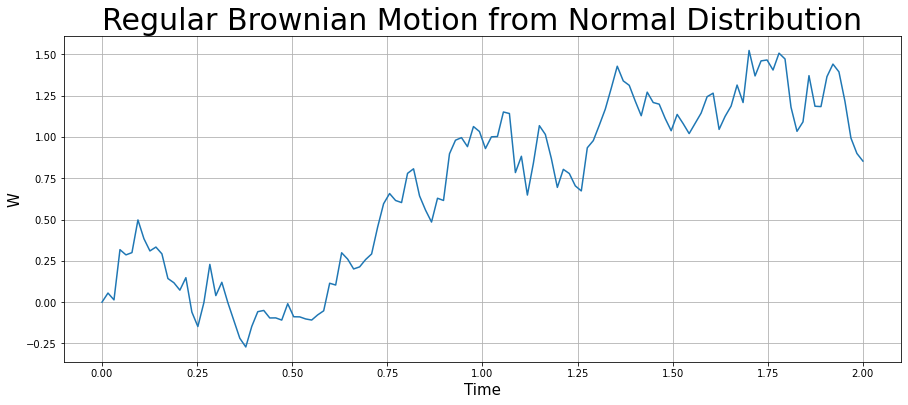

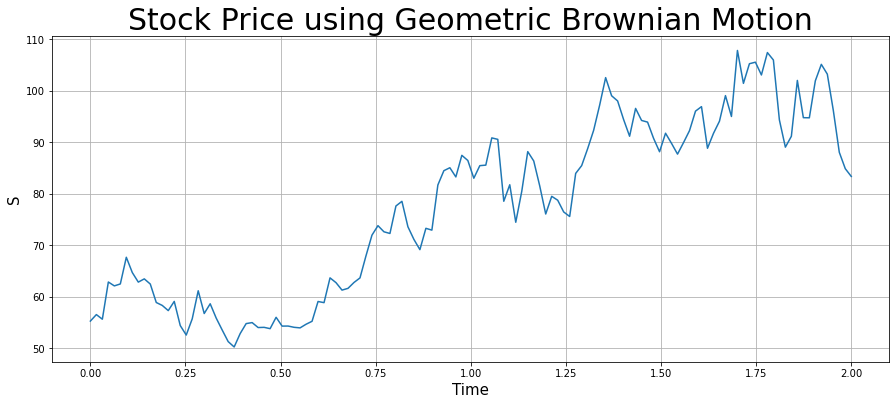

In [84]:
def geoBrownStock(s0,mu,sigma,t,n,seed):
    s = np.zeros(int(t*n))
    x,w = brownian(seed,t,n)
    plotB(x,w)
    for i in range(int(t*n)):
        s[i] = s0*math.exp((mu-sigma*sigma/2)*(i/((n*t))) + (sigma*w[i]) ) 
    plt.figure(figsize=(15, 6))
    plt.plot(x,s)
    plt.title('Stock Price using Geometric Brownian Motion', fontsize=30)
    plt.ylabel('S', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()
    return w,s
    
w,stock = geoBrownStock(55.25,0.15,0.4,2,64,5)

## Here, N = 64, T = 2

## Question 3

In [85]:
def showStock(df1,t,n):
    plt.figure(figsize=(15, 6))
    plt.plot(np.linspace(0,t,num=int(t*n)),df1)
    plt.title('Original Stock Price using Data', fontsize=30)
    plt.ylabel('W', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()
    
def predictModel(df1):
    df1 = np.array(df1)
    df1 = df1[::-1]
    s0 = df1[0]
    df2 = np.zeros(df1.size-1)
    summ = 0
    for i in range(df1.size-1):
        df2[i] = (df1[i+1]-df1[i])/df1[i]
    mu = df2.mean()*365
    df3 = np.zeros(df1.size-1)
    for i in range(1,df3.size+1):
        df3[i-1] = np.log(df1[i]/df1[i-1])
    mean = df3.mean()
    s = 0;
    for i in range(df3.size):
        s = s + (df3[i] - mean)*(df3[i] - mean)
    s = s / (df3.size - 1)
    s = math.sqrt(s)
    sigma = s / math.sqrt(1/365.00)
    
    print("Predicted Mean: "+str(mu))
    print("Predicted Sigma: "+str(sigma))
    
    w,stock = geoBrownStock(s0,mu,sigma,df1.size/365.00,365.00,22)
    
    df2 = np.zeros(stock.size-1)
    for i in range(stock.size-1):
        df2[i] = (stock[i+1]-stock[i])/stock[i]
    mu = df2.mean()*365
    df3 = np.zeros(stock.size-1)
    for i in range(1,df3.size+1):
        df3[i-1] = np.log(df1[i]/df1[i-1])
    mean = df3.mean()
    s = 0;
    for i in range(df3.size):
        s = s + (df3[i] - mean)*(df3[i] - mean)
    s = s / (df3.size - 1)
    s = math.sqrt(s)
    sigma = s / math.sqrt(1/365.00)
    
    print("Calculated Mean: "+str(mu))
    print("Calculated Sigma: "+str(sigma))

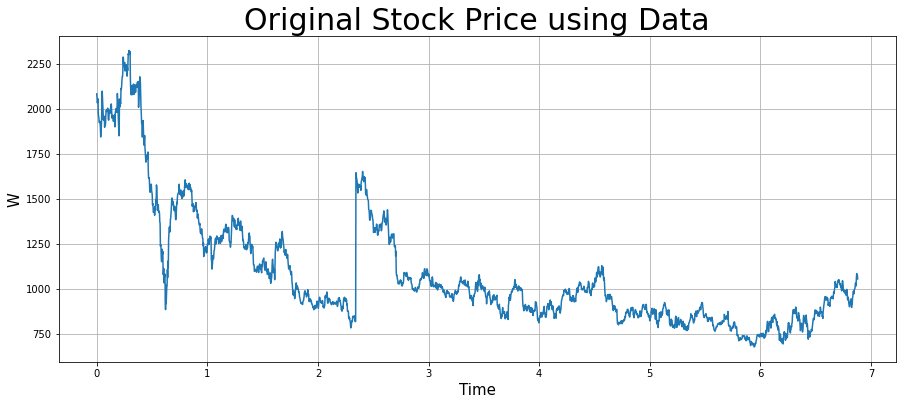

Predicted Mean: 0.187030447525858
Predicted Sigma: 0.4357231756110739


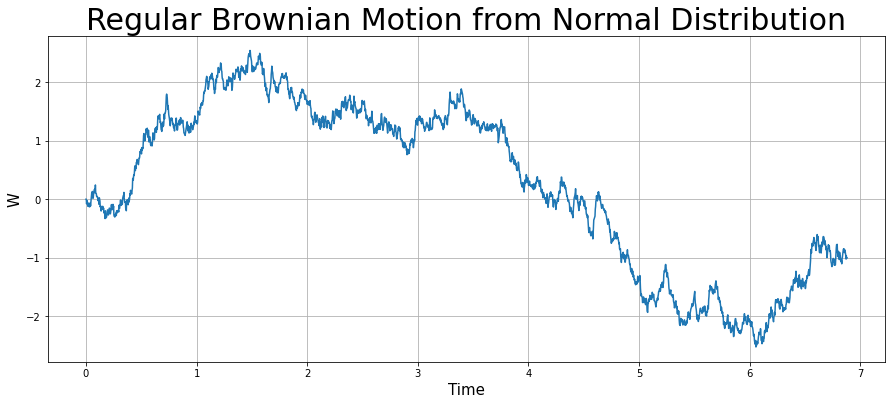

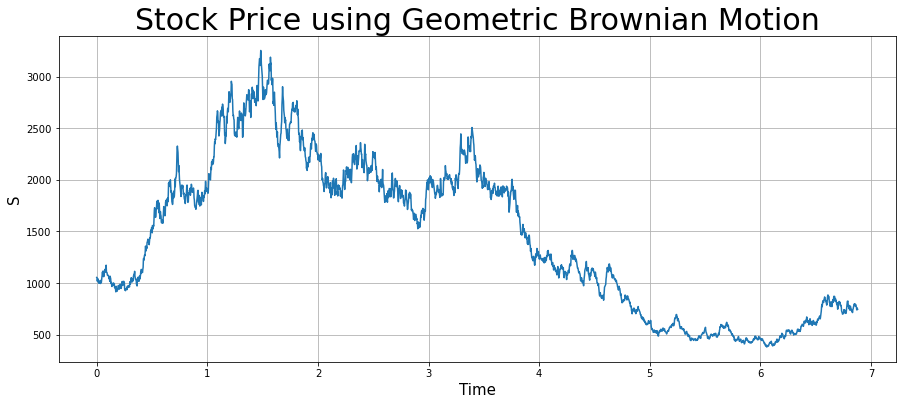

Calculated Mean: 0.04616030558334575
Calculated Sigma: 0.4357231756110739


In [86]:
df = pd.read_csv('REL.csv')
df1 = df['Close Price']

showStock(df1,df1.size/365.00,365.00)

predictModel(df1)

## Here, T = 2511/365, N = 365